<a href="https://colab.research.google.com/github/amannarsaria4/fast.ai/blob/master/Lesson%202/(Project1)lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision import *

In [ ]:
folder = 'teddys'
file = 'urls_teddys.txt'

In [ ]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents = True, exist_ok = True)


In [ ]:
download_images(dest/file,path/folder, max_pics=500)

In [ ]:
folder = 'black'
file = 'urls_black.txt'

In [ ]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents = True, exist_ok = True)


In [ ]:
download_images(dest/file,path/folder, max_pics=500)

In [ ]:
folder = 'grizzly'
file = 'urls_grizzly.txt'

In [ ]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents = True, exist_ok = True)

In [ ]:
download_images(dest/file, dest,max_pics=500)

In [ ]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

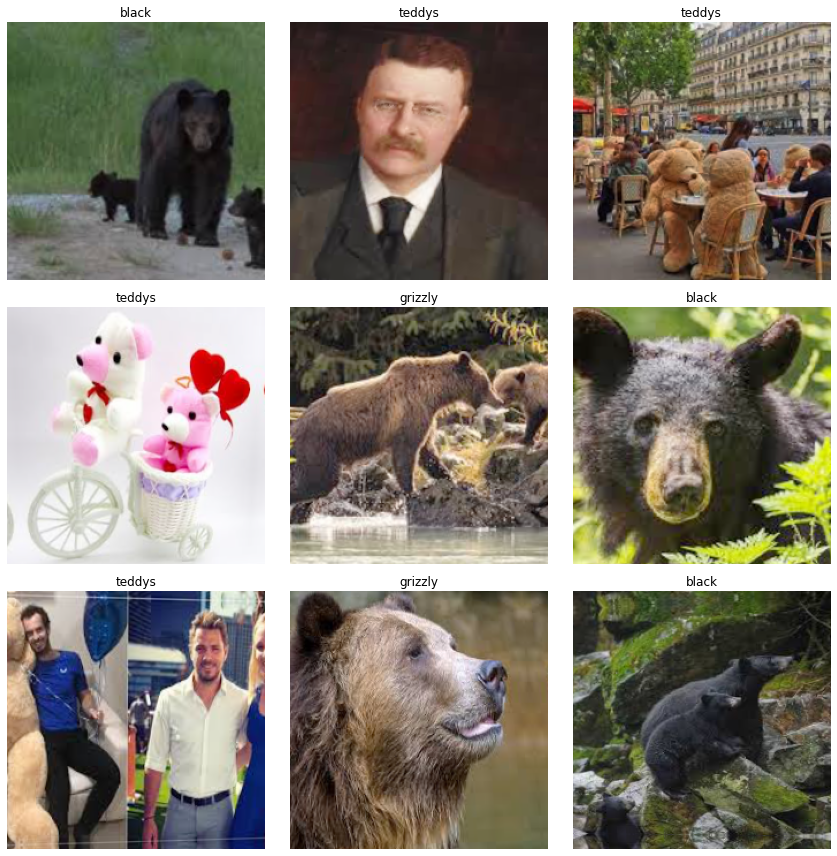

In [ ]:
data.show_batch(rows=3, fig_size =(6,6))

In [ ]:
data.c

3

In [ ]:
data.classes

['black', 'grizzly', 'teddys']

In [ ]:
len(data.train_ds)

773

In [ ]:
len(data.valid_ds)

193

In [ ]:
learn = cnn_learner(data, models.resnet34 , metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.model;

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.017529,0.353624,0.067358,00:12
1,0.548751,0.368745,0.041451,00:11
2,0.383154,0.286738,0.041451,00:11
3,0.289729,0.277233,0.041451,00:11


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


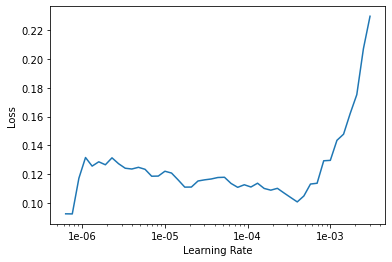

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, max_lr = slice(1e-3,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.129976,0.524142,0.113990,00:12
1,0.212849,0.511912,0.088083,00:12
2,0.201000,0.266073,0.067358,00:13


In [ ]:
learn.load('stage-1');

In [ ]:
interpret = ClassificationInterpretation.from_learner(learn)

In [ ]:
interpret.top_losses()

torch.return_types.topk(...)

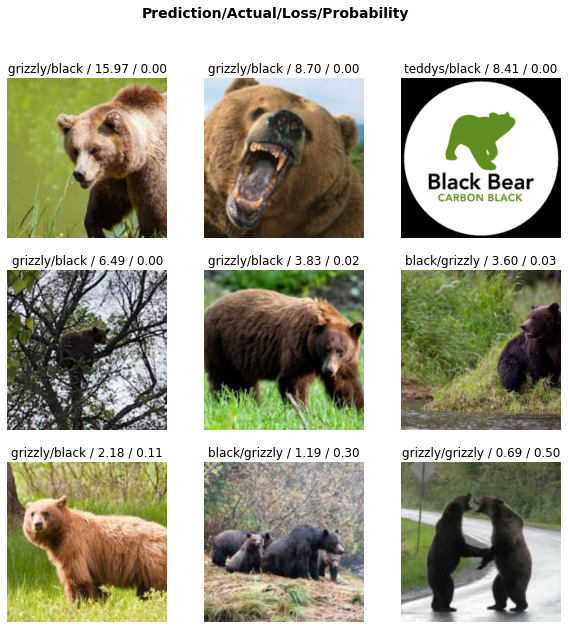

In [ ]:
interpret.plot_top_losses(9,figsize=(10,10))

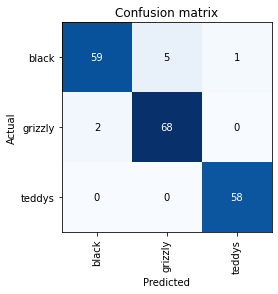

In [ ]:
interpret.plot_confusion_matrix()